I want to generate the three plots for two-step, linear, and inverse-linear

In [5]:
%matplotlib ipympl
from models import *
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt

mp.dps=400

Q=6.61e-4
alpha=1

R1=1015.29
delta1=0.2063
R2=674.915

freq_list=np.logspace(-3,3,50)

theta_dip_list0=[]
theta_dip_list1=[]
theta_dip_list2=[]

for profile in ["TLMtwo","TLMlinnew","TLMilinnew"]:
    for alpha in [1,0.9,0.8]:
        for R1 in R2*np.linspace(1.1,10,50):
            if profile=="TLMtwo":
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha],circuit=profile)
            else:    
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha],circuit=profile)
            
            zexp=cmodel.predict(frequencies=freq_list)
            dip_angle=alpha*45-np.min(-np.angle(zexp,deg=True))
            theta_dip_list2.append(dip_angle)
        theta_dip_list1.append(theta_dip_list2)
        theta_dip_list2=[]
    theta_dip_list0.append(theta_dip_list1)
    theta_dip_list1=[]
# theta_dip_list0


300
[1.00000000e-03 1.20679264e-03 1.45634848e-03 1.75751062e-03
 2.12095089e-03 2.55954792e-03 3.08884360e-03 3.72759372e-03
 4.49843267e-03 5.42867544e-03 6.55128557e-03 7.90604321e-03
 9.54095476e-03 1.15139540e-02 1.38949549e-02 1.67683294e-02
 2.02358965e-02 2.44205309e-02 2.94705170e-02 3.55648031e-02
 4.29193426e-02 5.17947468e-02 6.25055193e-02 7.54312006e-02
 9.10298178e-02 1.09854114e-01 1.32571137e-01 1.59985872e-01
 1.93069773e-01 2.32995181e-01 2.81176870e-01 3.39322177e-01
 4.09491506e-01 4.94171336e-01 5.96362332e-01 7.19685673e-01
 8.68511374e-01 1.04811313e+00 1.26485522e+00 1.52641797e+00
 1.84206997e+00 2.22299648e+00 2.68269580e+00 3.23745754e+00
 3.90693994e+00 4.71486636e+00 5.68986603e+00 6.86648845e+00
 8.28642773e+00 1.00000000e+01]


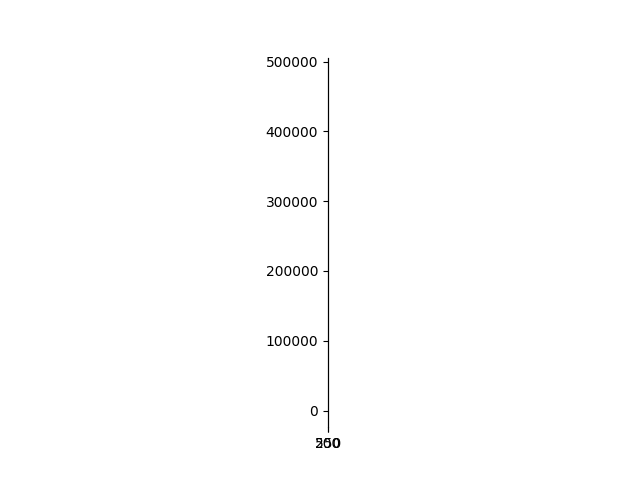

In [3]:
%matplotlib ipympl
from models import *
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt

mp.dps=300
print(mp.dps)

Q=6.61e-4
alpha=1

R1=1015.29
delta1=0.2063
R2=674.915

freq_list=np.logspace(-3,3,50)
print(freq_list)
cmodel=CustomCircuit(initial_guess=[R1,R1*Q,1.1*R1*Q,1],circuit="TLMilinnew")
zexp=cmodel.predict(frequencies=freq_list)


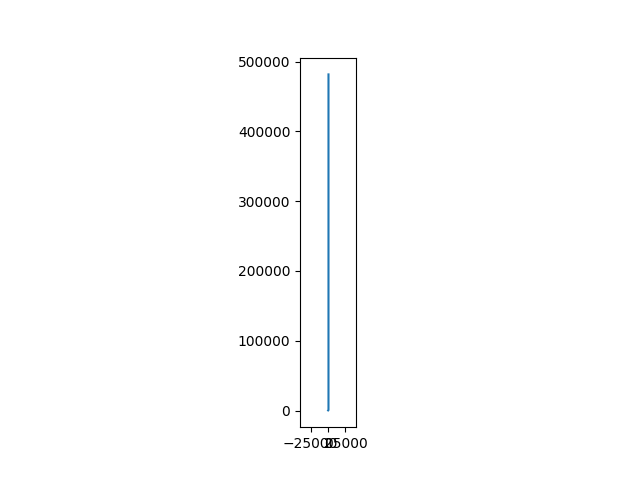

In [4]:
fig, axc= plt.subplots()
axc.plot(np.real(zexp),-np.imag(zexp))
axc.set_xlim(-40000,40000)
axc.set_aspect("equal")

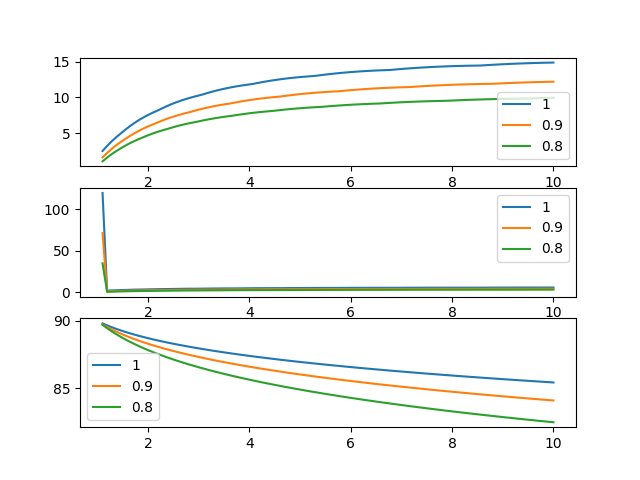

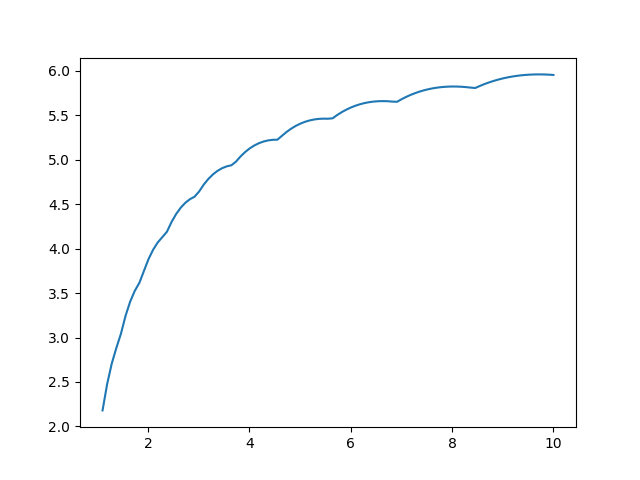

In [ ]:
fig, [ax_two, ax_lin, ax_ilin]=plt.subplots(3,1)
ax_list= [ax_two, ax_lin, ax_ilin]

for ax,theta in zip(ax_list,theta_dip_list0):
    for theta2,alpha in zip(theta,[1,0.9,0.8]):
        ax.plot(np.linspace(1.1,10,100),theta2,label=alpha)
        ax.legend()

gg=theta_dip_list0[1]
hh=gg[0]
fig,axx=plt.subplots()
axx.plot(np.linspace(1.1,10,99),hh[1:100])